# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/jeff/Documents/DS5030/ds5030submissions/data/iowa.csv')

data.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Zip Code',
       'Category Name', 'Vendor Name', 'Item Number', 'Item Description',
       'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Sale (Dollars)'],
      dtype='object')

In [3]:
data.head()

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00


Given the available data from the columns in the data set, there are many angles in which profitabiltiy can be measured. Basic profit can simply be measured by the retail price of the bottom, 'State Bottle Retail', minus the cost, 'State Bottle Cost'. However, this does not account for the size of the bottom based on volume, where theoretically, a small bottle is more profitable than a large bottle because it takes up less space and more bottles could be made available and thus sold. As a result, by adjusting the profit based on the size of the bottle and the number of bottles sold for both total volume and average transaction, the formula comes out to be (State Bottle Retail - State Bottle Cost) * Bottle Sold * Bottle Volume (ml). This is intended to not just analyze profit in terms of pure dollars, but also account for volume to take the perspective of the distribution of alcohol. 

In [4]:
# weighted by volume

data['profit'] = (data['State Bottle Retail'] - data['State Bottle Cost']) * data['Bottles Sold'] * data['Bottle Volume (ml)']

# general units: average dollar-mL per transaction, rather than sum total 

data1 = data.groupby('Item Description')['profit'].mean().sort_values(ascending=False).head(10)

data1 = data1.head(10)

# Note: mostly Kirkland brands

In [5]:
# based on sum, looking more at inventory total

data2 = data.groupby('Item Description')['profit'].sum().sort_values(ascending=False).head(10)

data2.head(10)

Item Description
TITOS HANDMADE VODKA               4.460914e+08
BLACK VELVET                       3.921715e+08
FIREBALL CINNAMON WHISKEY          1.642915e+08
HAWKEYE VODKA                      1.519267e+08
CROWN ROYAL                        1.507401e+08
CAPTAIN MORGAN SPICED RUM          1.416057e+08
JACK DANIELS OLD #7 BLACK LABEL    1.264060e+08
CROWN ROYAL REGAL APPLE            1.131045e+08
CAPTAIN MORGAN ORIGINAL SPICED     1.040774e+08
JACK DANIELS OLD #7 BLACK LBL      1.025302e+08
Name: profit, dtype: float64

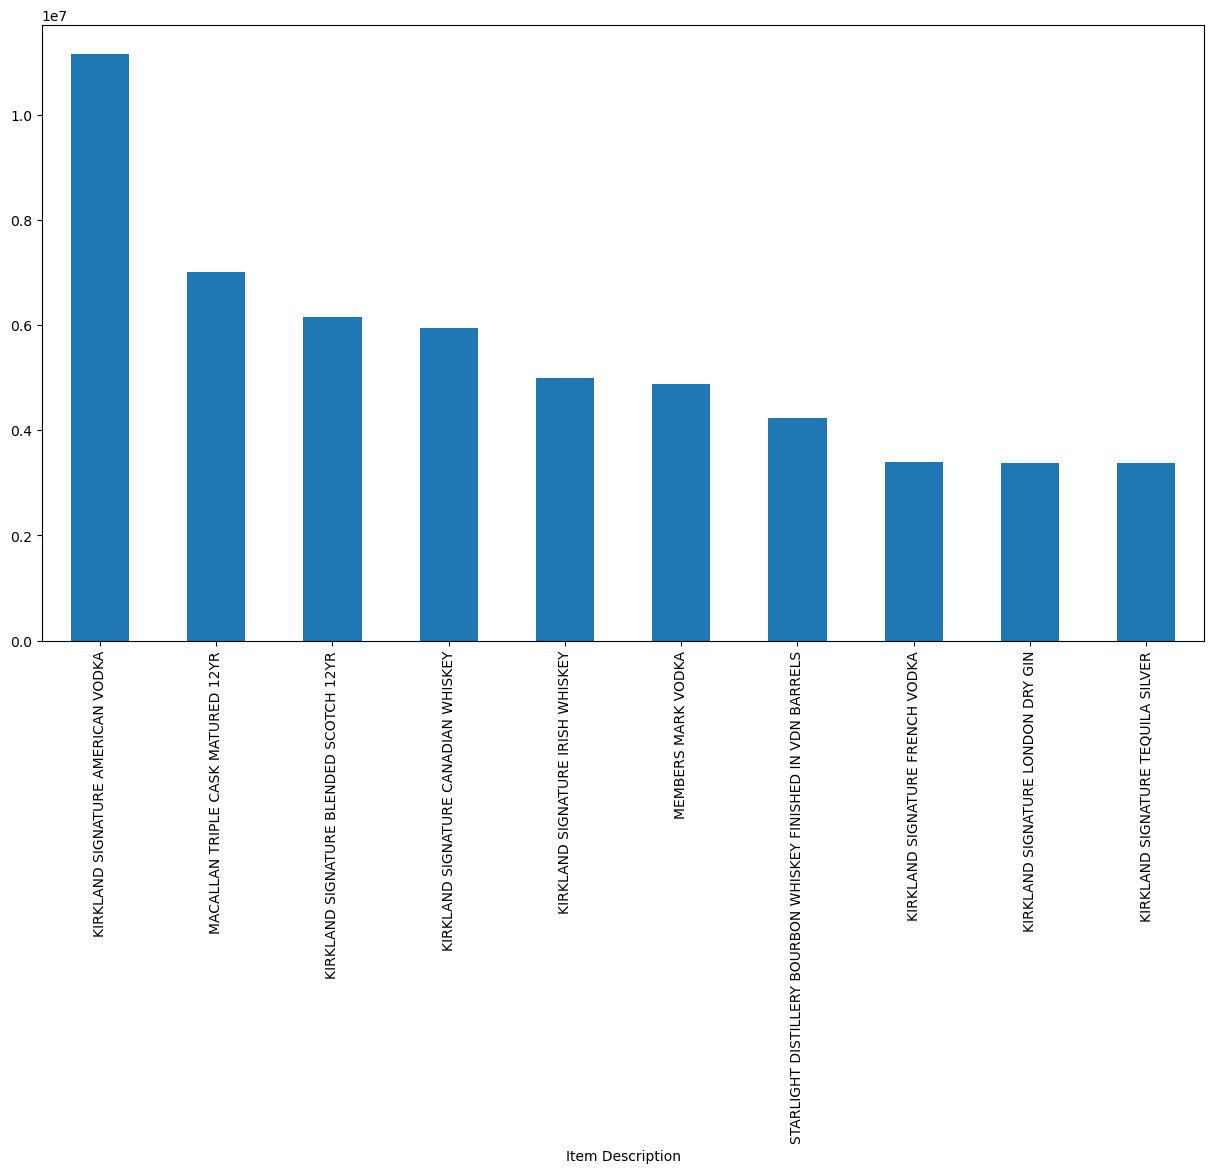

In [6]:
plt.figure(figsize=(15, 8))

data1.plot(kind='bar', figsize=(15, 8))
plt.show()

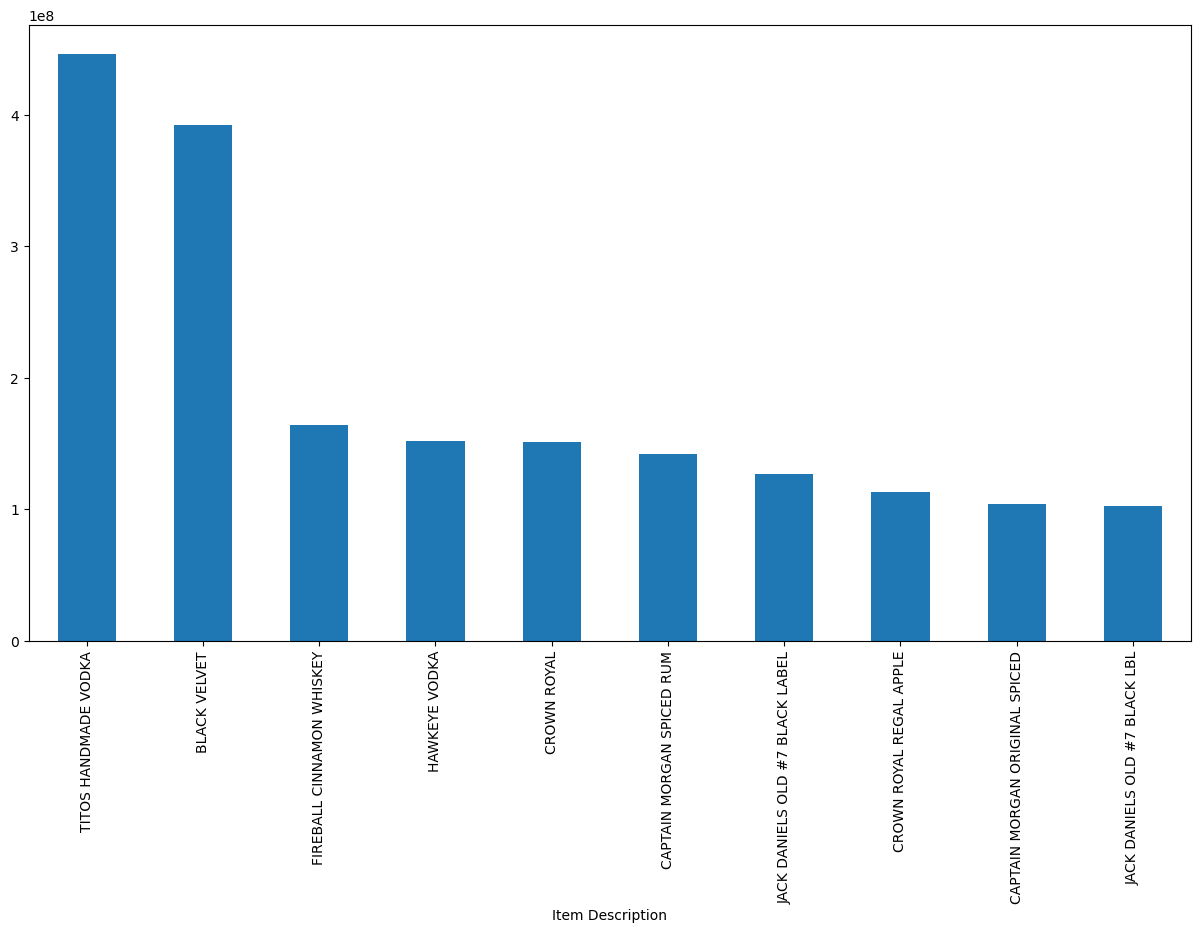

In [7]:
plt.figure(figsize=(15, 8))

data2.plot(kind='bar', figsize=(15, 8))
plt.show()

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [8]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])
# x - y : tried first bullet here 

Trying to conduct x - y, I am met with the Value Error: operands could not be broadcast together with shapes (3,) (2,). 

In [9]:
x.reshape(-1,1)-y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

There is no longer an error for the transformation, where now the output returns a shape of (3,2). 

In [10]:
x.reshape(1,-1)-y.reshape(-1,1)

array([[-1,  1,  3],
       [-4, -2,  0]])

Similarly, there is no longer an error with this transformation, where the reshape of x and y returns an array of shape (2,3).

In [11]:
t1 = np.zeros((len(x), len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        t1[i,j] = x[i] - y[j]

print(t1)

[[-1. -4.]
 [ 1. -2.]
 [ 3.  0.]]


In [12]:
t2 = np.zeros((len(y), len(x)))

for i in range(len(y)):
    for j in range(len(x)):
        t2[i,j] = x[j] - y[i]

print(t2)

[[-1.  1.  3.]
 [-4. -2.  0.]]


Breaking down each part of the fourth bullet, x.reshape(1, -1) is based off of x, which is an array of shape (3,). x.reshape(1, -1) should then basically convert the array with 1 row, and however many columns are needed. In this case, since the original array had 3 elements, the shape becomes (1,3). However, on the contrary, x.reshape(-1, 1) works completely differently. Instead of going with one row, we start with one column, only after determining the number of rows based on the original array shape. This returns a shape of (3,1). 

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

a) For x = 3, given the indictator function, for any value of z where I{3 <= z}, where for all values of z < 3, there is a flat line at 0, then at 3, jumps out to 1, and stay flat at 1 for all values of z > 3.

b) Looking back at the definition of the indicator function, we can compute the cases or possible scenarios to see if both sides of the equation lineup. 

Case 1, where x <= z, means I{x <= z} = 1, so the left side is 1 - 1 = 0. The right hand side is flipped where I{x > z} = 0, so the right hand side is 0, and thus LHS = RHS

For case 2, where x > z, definition shows that I{x<=z} = 0, so the left hand side is 1 - 0 = I{x > z}, which is also one. On the other hand, x<= z, which means it is 1. This also further confirms that LHS = RHS. 

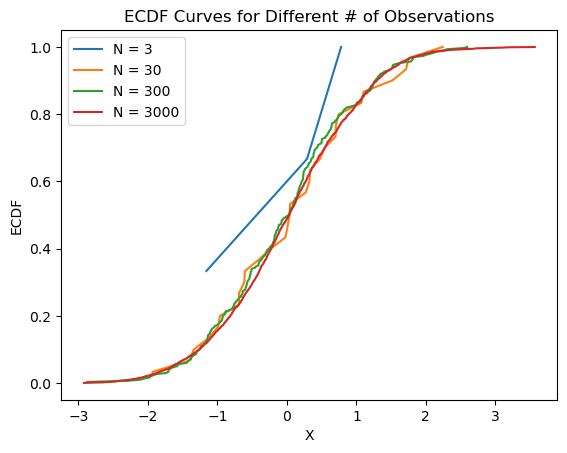

In [13]:
import numpy as np
import seaborn as sns

def ecdf(x, plot = True): # from 01_visualizing_uncertainty.ipynb
    # Compute ecdf function:
    Z = np.sort(x.unique()) # Extract and sort unique values for x
    compare = x.to_numpy().reshape(-1,1) <= Z.reshape(1,-1) # Compare x and Z values
    
    ecdf = np.mean(compare,axis=0) # Average over x indices for each z
    
    if plot:
        # Plot the ecdf:
        title_str = x.name
        plt.plot(Z,ecdf)
        plt.title(f'Empirical CDF: {title_str}')
        plt.ylabel('Proportion')
        plt.xlabel(title_str)

    return ecdf, Z

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)

    # ECDF plot goes here:

    seriesX = pd.Series(X, name=f'N={N}')
    F_hat, grid = ecdf(seriesX, plot = True)

plt.legend(['N = 3', 'N = 30', 'N = 300', 'N = 3000'])
plt.title('ECDF Curves for Different # of Observations')
plt.xlabel('X')
plt.ylabel('ECDF')
plt.show()

Looking at the ECDF plot, it is clear that as N becomes larger, the curve itself begins to smoothen out. For lines like N = 3 and N = 30, there are sharp curves that are apparent, but no longer exist for the significantly smoother N = 3000 line. This likely reflects a more accurate representation of the ECDF due to the larger size as the actual ECDF gravitates towards the theorietical ECDF.

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [14]:
def quantile_calc(x, q): 
    """Compute any quantile without using Numpy's `np.quantile`."""

    x = np.sort(x)
    n = len(x)
    position = (q * n) - 1 # position in the array 

    minimum = int(np.floor(position))
    maximum = int(np.ceil(position))

    if minimum == maximum:
        return float(x[minimum])
    else:
        return float(x[minimum] + (position - minimum) * (x[maximum] - x[minimum]))

In [15]:
def iqr(x):
    """computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR"""
    
    lower_quantile = quantile_calc(x, 0.25)
    upper_quantile = quantile_calc(x, 0.75)

    interquartileRange = upper_quantile - lower_quantile

    lower_whisker = lower_quantile - 1.5 * interquartileRange
    upper_whisker = upper_quantile + 1.5 * interquartileRange

    return float(lower_quantile), float(upper_quantile), float(interquartileRange), float(lower_whisker), float(upper_whisker)

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
/var/folders/dv/rwkhhnhs4c9frqn6rc7njm6h0000gn/T/ipykernel_89147/1478247286.py:2: SyntaxWarning: invalid escape sequence '\p'
  """computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR"""


In [16]:
def fiveNumSum(x):
    """ computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers."""
    
    lower_quantile, upper_quantile, interquartileRange, lower_whisker, upper_whisker = iqr(x)

    return { # no iqr 
        'Minimum': float(np.min(x)),
        'Q1': float(lower_quantile),
        'Median': float(quantile_calc(x, 0.5)),
        'Q3': float(upper_quantile),
        'Maximum': float(np.max(x)),
        'Lower Whisker': float(lower_whisker),
        'Upper Whisker': float(upper_whisker)
    }

In [17]:
def outlier(x):
    """Returns a Boolean vector indicating if the observations are outliers"""
    
    lower_whisker, upper_whisker = iqr(x)[3], iqr(x)[4]

    return (x < lower_whisker) | (x > upper_whisker)

In [ ]:
# data.head()

numVar = data['State Bottle Cost']

print(quantile_calc(numVar, 0.25))

print(iqr(numVar))

print(fiveNumSum(numVar))

print(outlier(numVar).head(5)) # not all values


5.78
(5.78, 13.25, 7.47, -5.425, 24.455)
{'Minimum': 0.0, 'Q1': 5.78, 'Median': 8.66, 'Q3': 13.25, 'Maximum': 2298.84, 'Lower Whisker': -5.425, 'Upper Whisker': 24.455}
0    False
1    False
2    False
3    False
4    False
Name: State Bottle Cost, dtype: bool


<Axes: xlabel='State Bottle Cost'>

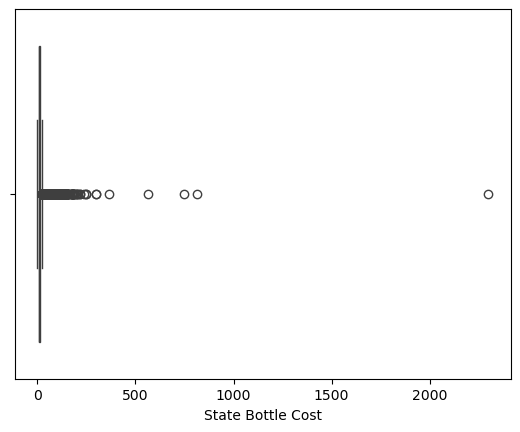

In [19]:
sns.boxplot(numVar, orient = 'h')

In [21]:
data['State Bottle Cost'].describe()

count    159904.000000
mean         10.980340
std          11.399802
min           0.000000
25%           5.780000
50%           8.660000
75%          13.250000
max        2298.840000
Name: State Bottle Cost, dtype: float64

Given the values and distribution by the boxplot and describe function, we can confirm the outputs of the written functions. 

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?